## Data Preprocessing For The Neural Network

In [13]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Importing The Required Libraries

In [7]:
import pandas as pd;
import numpy as np;
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Importing The Dataset

In [8]:
dataset = pd.read_csv("/content/drive/MyDrive/Kidney.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.rename(columns={" Value":"Value"},inplace=True)

Sorting The Data Based On The Date & City

In [30]:
dataset_sort = dataset.sort_values(by=["Date","City"])
dataset_sort.head(10)

,Date,City,Value
180,2010-01-01,Ampara,17
228,2010-01-01,Anuradapura,818
252,2010-01-01,Badulla,130
168,2010-01-01,Battocolo,427
0,2010-01-01,Colombo,46
72,2010-01-01,Galle,50
12,2010-01-01,Gampaha,374
84,2010-01-01,Hambantota,69
108,2010-01-01,Jaffna,201
300,2010-01-01,Kalminai,301


One-Hot Encode The City Column

* This will create new columns for each city, such as City_Colombo, City_Gampaha, etc., where each row will have a 1 in the column corresponding to the city and 0 elsewhere.

In [31]:
# prompt: from the dataset find all the entries where city= "Anuradhapura" and add that to another variable named "Dataset_A"

Dataset_A = dataset_sort[dataset_sort["City"] == "Anuradapura"]
Dataset_B = dataset_sort[dataset_sort["City"] == "Colombo"]
Dataset_C = dataset_sort[dataset_sort["City"] == "Battocolo"]
Dataset_D = dataset_sort[dataset_sort["City"] == "Gampaha"]




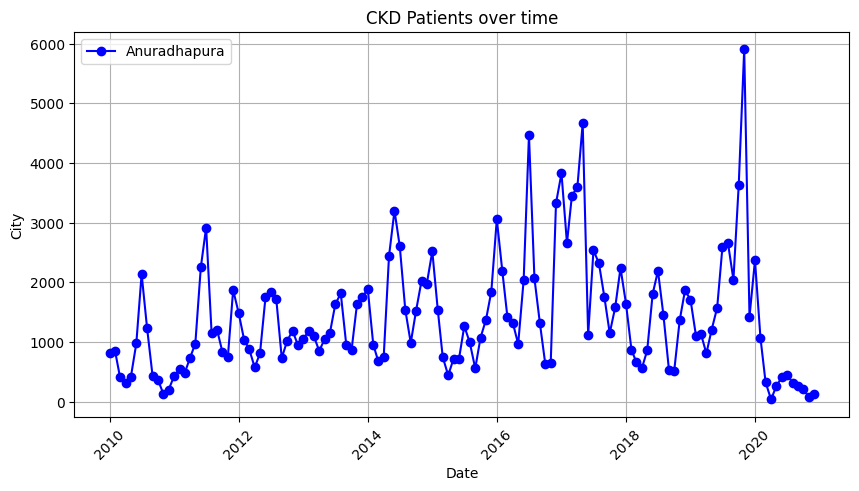

In [25]:
plt.figure(figsize=(10, 5))  # Set figure size

plt.plot(Dataset_A["Date"], Dataset_A['Value'], marker="o", linestyle="-", color="b", label="Anuradhapura")

plt.xlabel("Date")  # Label for X-axis
plt.ylabel("City")  # Label for Y-axis
plt.title("CKD Patients over time")  # Set the title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot


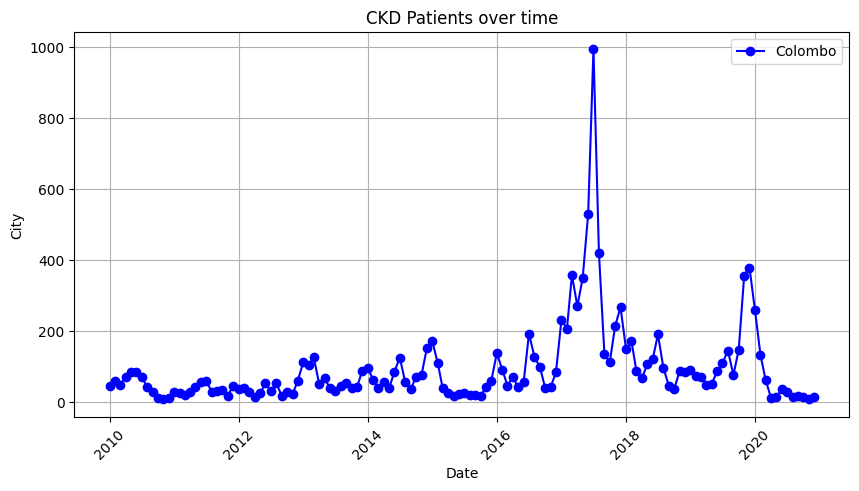

In [27]:
plt.figure(figsize=(10, 5))  # Set figure size

plt.plot(Dataset_B["Date"], Dataset_B['Value'], marker="o", linestyle="-", color="b", label="Colombo")

plt.xlabel("Date")  # Label for X-axis
plt.ylabel("City")  # Label for Y-axis
plt.title("CKD Patients over time")  # Set the title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

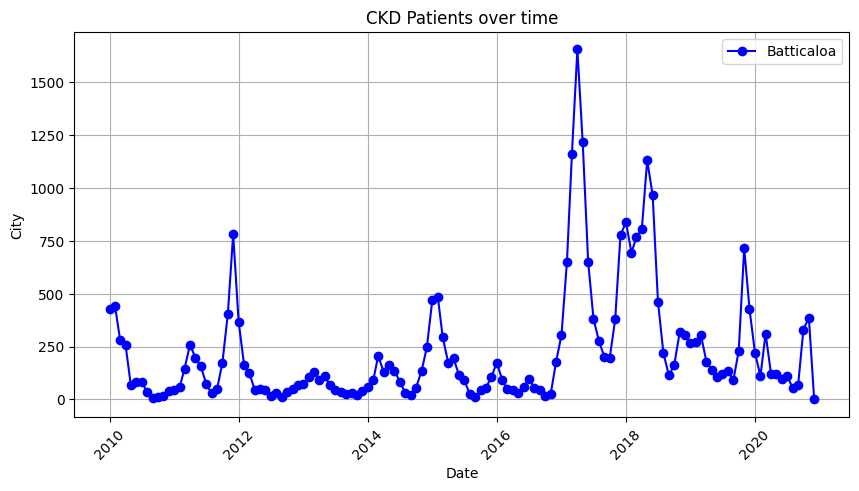

In [29]:
plt.figure(figsize=(10, 5))  # Set figure size

plt.plot(Dataset_C["Date"], Dataset_C['Value'], marker="o", linestyle="-", color="b", label="Batticaloa")

plt.xlabel("Date")  # Label for X-axis
plt.ylabel("City")  # Label for Y-axis
plt.title("CKD Patients over time")  # Set the title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

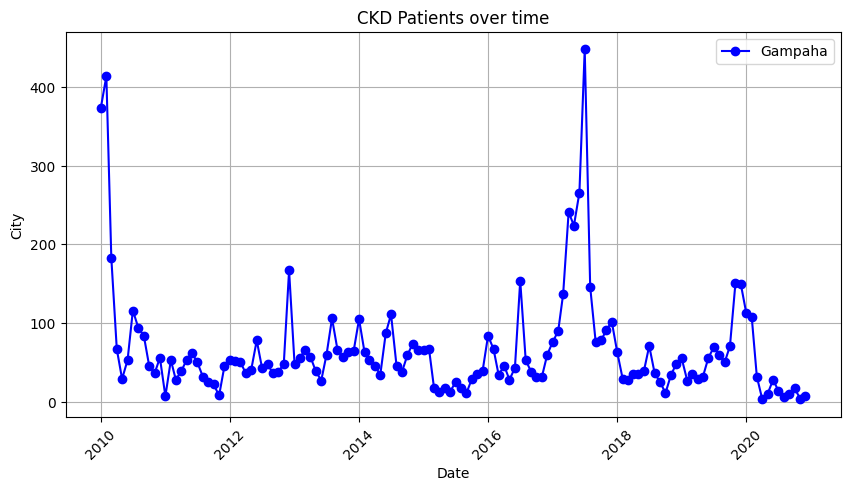

In [32]:
plt.figure(figsize=(10, 5))  # Set figure size

plt.plot(Dataset_D["Date"], Dataset_D['Value'], marker="o", linestyle="-", color="b", label="Gampaha")

plt.xlabel("Date")  # Label for X-axis
plt.ylabel("City")  # Label for Y-axis
plt.title("CKD Patients over time")  # Set the title of the plot
plt.legend()  # Show the legend
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()  # Display the plot

In [ ]:
dataset_city_encode = pd.get_dummies(dataset_sort,columns=["City"],prefix="City")
city_columns = [col for col in dataset_city_encode.columns if col.startswith("City")]
dataset_city_encode[city_columns] = dataset_city_encode[city_columns].astype(int)

Scalling The Features

In [ ]:
dataset_values = dataset_city_encode.iloc[:,1:2].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_city_encode["Value"]=scaler.fit_transform(dataset_values)
dataset_city_encode.drop("Date",axis=1,inplace=True)

In [ ]:
dataset_city_encode.to_csv("/content/drive/MyDrive/RNN_Preprocessed_Dataset.csv")